In [1]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)

This is a model of a non-oscillatory neuron that when coupled with another in mutually inhibitory ways, produce oscillations. There are two state variables: Memberane potential $V$ and inactivation $h$. 

\begin{align}
C\frac{dV_i}{dt} &= -g_{pir} m^3_{\infty}\left(V_i\right)h_i \left(V_i-V_{pir}\right)-g_L\left(V_i-V_L\right) - g_{syn}s_{ji}(V_j)\left(V_i - V_{syn}\right) \\
\frac{dh_i}{dt} &= \frac{\phi \left[h_{\infty}(V_i) - h_i\right]}{\tau_h(V_i)}
\end{align}


+ $k_{syn} = 2$
+ $g_{syn} = 0.3$
+ $g_{pir} = 0.1$
+ $V_{pir} = 120$
+ $V_L = -60$
+ $V_{syn} = -80$
+ $C = 1$
+ $g_L = 0.1$
+ $\tau_0 = 10$
+ $\phi = 3$
+ $\theta_{syn} = -44$
+ $s_{ji} = S_{\infty} \left(V_j\right) = 1/\left\{1+\exp\left[-\left(V_j-\theta_{sync}\right)/k_{syn}\right]\right\}$
+ $m_{\infty}\left(V\right) = 1/\left\{1+\exp\left[-\left(V+65\right)/7.8\right]\right\}$
+ $h_{\infty}\left(V\right) = 1/\left\{1+\exp\left[\left(V+81\right)/11\right]\right\}$
+ $\tau_h \left(V\right)= h_{\infty}\left(V\right)\exp\left[\left(V+162.3\right)/17.8\right]$

In [7]:
tend = 400
dt   = 0.1

numNeurons = 2
neurons = []
input = [-38,-65]
for i in range(numNeurons):
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend, g_pir=0.3, V_pir=120., g_L=0.1, V_L=-60., g_syn=0.3, V_syn=-80., phi=3., tau_0=10., theta_syn=-44., k_syn=2., I=input[i])
    n.Initialize([input[i],-1])
    n.SetFlow(n.SIFlow)
    neurons.append(n)


s0 = Synapse(0,neurons[0],neurons[1])
s0._SynapticStrength = 1
s1 = Synapse(1,neurons[1],neurons[0])
s1._SynapticStrength = 1
neurons[0]._Synapses.append(s0)
neurons[1]._Synapses.append(s1)

b = Brain(neurons=neurons,dt=dt,tend=tend)
b.SetSynpaseProbability(False,1)
b._Synapses[0]=s0
b._Synapses[1]=s1
b.Simulate()

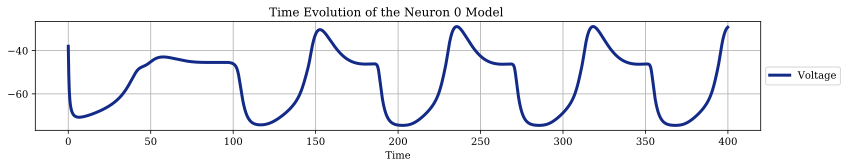

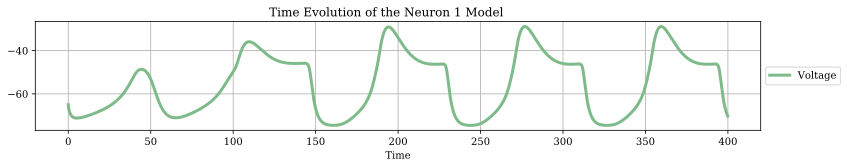

In [8]:
plt.rcParams["figure.figsize"] = (13, 2)
for n in range(numNeurons):
    b._Neurons[n].PlotState(states={0:"V"},legend=["Voltage","Inactivation"])

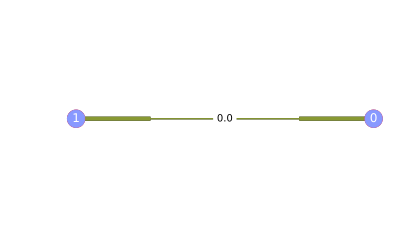

In [9]:
plt.rcParams["figure.figsize"] = (5, 3)
b.DrawNetwork()

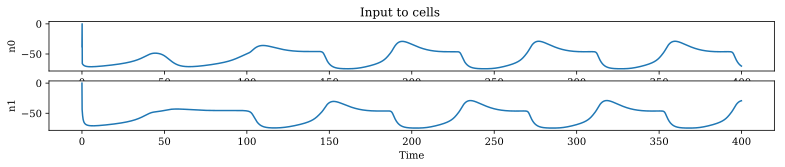

In [10]:
plt.rcParams["figure.figsize"] = (13, numNeurons)
plt.suptitle('Input to cells')
for i in range(numNeurons): 
    plt.subplot(numNeurons,1,i+1)
    plt.plot(b._Neurons[i]._Time, b._Neurons[i]._II)
    plt.ylabel("n{}".format(i))
    plt.xlabel("Time")
plt.show()